In [1]:
# For tips on running notebooks in Google Colab, see
# https://pytorch.org/tutorials/beginner/colab
%matplotlib inline

[Learn the Basics](intro.html) \|\|
[Quickstart](quickstart_tutorial.html) \|\|
[Tensors](tensorqs_tutorial.html) \|\| [Datasets &
DataLoaders](data_tutorial.html) \|\| **Transforms** \|\| [Build
Model](buildmodel_tutorial.html) \|\|
[Autograd](autogradqs_tutorial.html) \|\|
[Optimization](optimization_tutorial.html) \|\| [Save & Load
Model](saveloadrun_tutorial.html)

Transforms
==========

Data does not always come in its final processed form that is required
for training machine learning algorithms. We use **transforms** to
perform some manipulation of the data and make it suitable for training.

All TorchVision datasets have two parameters -`transform` to modify the
features and `target_transform` to modify the labels - that accept
callables containing the transformation logic. The
[torchvision.transforms](https://pytorch.org/vision/stable/transforms.html)
module offers several commonly-used transforms out of the box.

The FashionMNIST features are in PIL Image format, and the labels are
integers. For training, we need the features as normalized tensors, and
the labels as one-hot encoded tensors. To make these transformations, we
use `ToTensor` and `Lambda`.


In [6]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)
ds.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
           0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,
          36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,
         102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

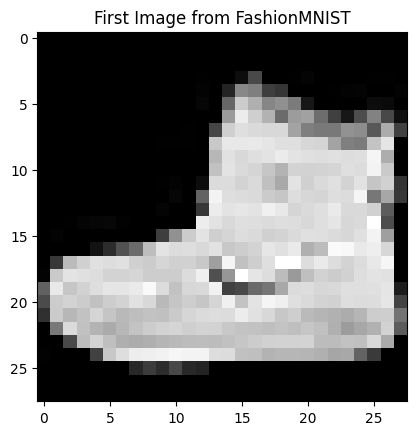

In [7]:
import matplotlib.pyplot as plt

# Get the first image data
image_data = ds.data[0]

# Display the image using matplotlib
plt.imshow(image_data, cmap='gray')  # cmap='gray' for grayscale
plt.title("First Image from FashionMNIST")
plt.show()

ToTensor()
==========

[ToTensor](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.ToTensor)
converts a PIL image or NumPy `ndarray` into a `FloatTensor`. and scales
the image\'s pixel intensity values in the range \[0., 1.\]


Lambda Transforms
=================

Lambda transforms apply any user-defined lambda function. Here, we
define a function to turn the integer into a one-hot encoded tensor. It
first creates a zero tensor of size 10 (the number of labels in our
dataset) and calls
[scatter\_](https://pytorch.org/docs/stable/generated/torch.Tensor.scatter_.html)
which assigns a `value=1` on the index as given by the label `y`.


In [4]:
target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))
target_transform

Lambda()

------------------------------------------------------------------------


Further Reading
===============

-   [torchvision.transforms
    API](https://pytorch.org/vision/stable/transforms.html)
